In [7]:
import pandas as pd

def parse_ecg_log_to_dataframe(log_file_path):
    """
    Parse ECG values from a log file into a DataFrame.
    
    Parameters:
        log_file_path (str): The path to the log file.

    Returns:
        DataFrame: A DataFrame containing the ECG values, with invalid entries set to NaN.
    """
    data = {'ECG Value': []}

    with open(log_file_path, 'r') as file:
        for line in file:
            if "ECG_VALUE" in line:

                parts = line.strip().split()


                etag = int(parts[2].strip(','))  # Extracting ETAG value
                ecg_value = int(parts[-1])       # Extracting ECG value

                # Check ETAG for validity
                if etag in [0, 2]:
                    data['ECG Value'].append(ecg_value)
                else:
                    data['ECG Value'].append(float('nan'))  # Append NaN for invalid ETAGs

    # Create DataFrame
    df = pd.DataFrame(data)
    return df

# Example usage
log_file_path = 'Sample.log'
df = parse_ecg_log_to_dataframe(log_file_path)
print(df)


      ECG Value
0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
...         ...
5321        NaN
5322        NaN
5323        NaN
5324        NaN
5325        NaN

[5326 rows x 1 columns]


In [8]:
import pandas as pd

def parse_ecg_log_to_dataframe(log_file_path):
    """
    Parse ECG values from a log file into a DataFrame.
    
    Parameters:
        log_file_path (str): The path to the log file.

    Returns:
        DataFrame: A DataFrame containing the ECG values, with invalid entries set to NaN.
    """
    data = {'ECG Value': []}

    with open(log_file_path, 'r') as file:
        for line in file:
            if "ECG_VALUE" in line:

                parts = line.strip().split()



                ecg_value = int(parts[-1])       # Extracting ECG value
                data['ECG Value'].append(ecg_value)

    # Create DataFrame
    data['ECG Value'] = [x for x in data['ECG Value'] if x != 0]
    df = pd.DataFrame(data)
    return df

# Example usage
log_file_path = 'Sample.log'
df = parse_ecg_log_to_dataframe(log_file_path)
print(df)


       ECG Value
0           4727
1           4816
2           4857
3           4811
4           4716
...          ...
13843       -326
13844       -370
13845       -424
13846       -449
13847       -454

[13848 rows x 1 columns]


In [9]:
df.to_csv('temp.csv')

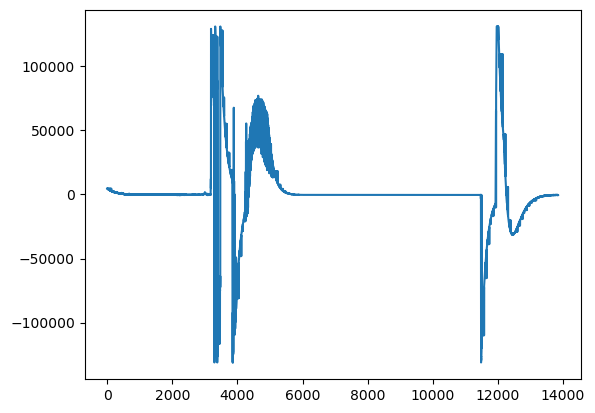

In [10]:
import matplotlib.pyplot as plt
plt.plot(df)